In [62]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score
import collections as c
import matplotlib.pyplot as plt
plt.style.use('ggplot')
font = {'size'   : 30}
plt.rc('font', **font)
plt.ion()
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams["figure.figsize"] = (20.0, 10.0)
import random
%matplotlib inline
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)
import warnings
warnings.filterwarnings('ignore')

In [63]:
rf_model = pickle.load(open('random_forest_completion_first_half.p', 'rb')) # load the model

In [64]:
rf_model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [65]:
def standard_confusion_matrix(y_true, y_pred):
    """Make confusion matrix with format:
                  -----------
                  | TP | FP |
                  -----------
                  | FN | TN |
                  -----------
    Parameters
    ----------
    y_true : ndarray - 1D
    y_pred : ndarray - 1D

    Returns
    -------
    ndarray - 2D
    """
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def print_roc_curve(y_test, probabilities, model_type):
    '''
    Calculates and prints a ROC curve given a set of test classes and probabilities from a trained classifier
    '''
    tprs, fprs, thresh = roc_curve(y_test, probabilities)
    plt.figure(figsize=(12,10))
    plt.plot(fprs, tprs, 
         label=model_type, 
         color='blue', 
         lw=3)
    plt.plot([0,1],[0,1], 'k:')
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve AUC: {} Recall: {}".format(roc_auc, recall))
    plt.show()

In [66]:
X_test = pd.read_csv('../data/processed/first_half/X_test.csv')
y_test = pd.read_csv('../data/processed/first_half/y_test.csv')
y_test = y_test['module_not_completed']

# fill
X_test.fillna(value = 0, inplace = True)

In [67]:
    predictions = rf_model.predict(X_test)
    roc_auc = roc_auc_score(y_test, predictions)
    probas = rf_model.predict_proba(X_test)[:, :1]
    tprs, fprs, thresh = roc_curve(y_test, probas)
    recall = recall_score(y_test, predictions)
    conf_mat = standard_confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

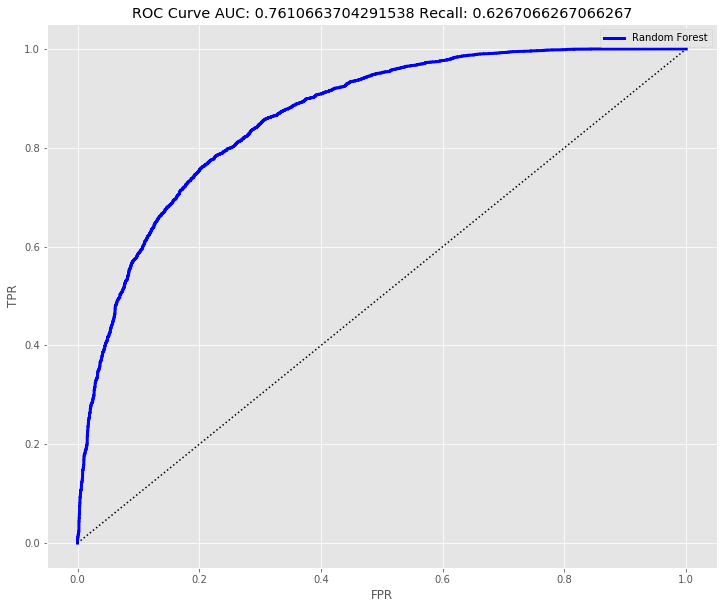

Best Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Roc Auc: 0.7610663704291538

Recall Score: 0.6267066267066267

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.90      0.85      5116
        True       0.78      0.63      0.69      3003

   micro avg       0.80      0.80      0.80      8119
   macro avg       0.79      0.76      0.77      8119
weighted avg       0.79      0.80      0.79      8119


Confusion Matrix:
 [[1882  535]
 [1121 4581]]


In [68]:
    print_roc_curve(y_test, probas, 'Random Forest')
    print('Best Model: {}'.format(rf_model))
    print('\nRoc Auc: {}'.format(roc_auc))
    print('\nRecall Score: {}'.format(recall))
    print('\nClassification Report:\n {}'.format(class_report))
    print('\nConfusion Matrix:\n {}'.format(standard_confusion_matrix(y_test, predictions)))

In [27]:
feat_imp = importances(rf_model, X_test, y_test)

In [ ]:
feat_imp.sort_values(by='Importance', ascending=False)[0:10]

In [ ]:
pd.DataFrame(data={'fprs': fprs, 'tprs': tprs, 'Thresholds': thresh}).loc[300:1000:25]

## Model Improvement Over Baseline

In [69]:
proportion = y_test.sum() / y_test.shape[0]

In [70]:
# randomly pedict ~1/3 = true
proportion = 0.33567943348158386
baseline_preds = []
for n in range(len(y_test)):
    if random.random() < proportion:
        baseline_preds.append(True)
    else:
        baseline_preds.append(False)

In [71]:
baseline_probas = np.array([proportion] * len(y_test))

In [72]:
    predictions = baseline_preds
    roc_auc = roc_auc_score(y_test, predictions)
    probas = baseline_probas
    tprs, fprs, thresh = roc_curve(y_test, probas)
    recall = recall_score(y_test, predictions, average='micro')
    conf_mat = standard_confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

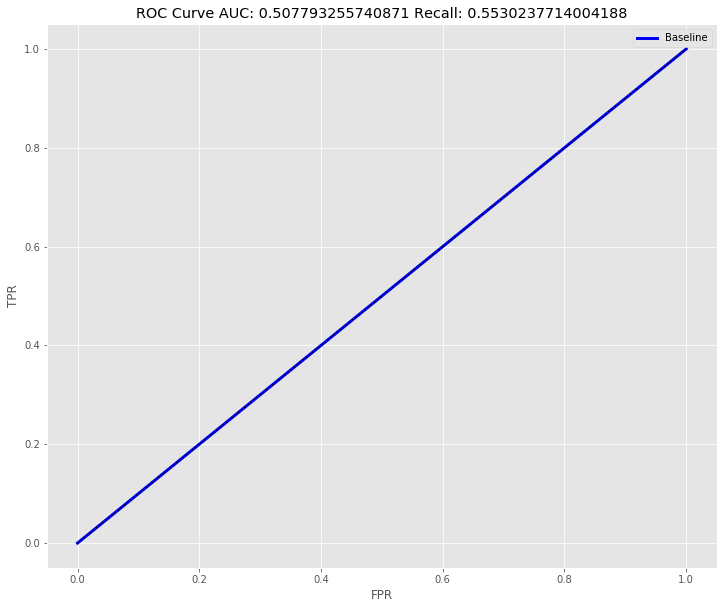


Roc Auc: 0.507793255740871

Recall Score: 0.5530237714004188

Classification Report:
               precision    recall  f1-score   support

       False       0.64      0.68      0.66      5116
        True       0.38      0.33      0.36      3003

   micro avg       0.55      0.55      0.55      8119
   macro avg       0.51      0.51      0.51      8119
weighted avg       0.54      0.55      0.55      8119


Confusion Matrix:
 [[1003 1629]
 [2000 3487]]


In [75]:
    print_roc_curve(y_test, probas, 'Baseline')
    print('\nRoc Auc: {}'.format(roc_auc))
    print('\nRecall Score: {}'.format(recall))
    print('\nClassification Report:\n {}'.format(class_report))
    print('\nConfusion Matrix:\n {}'.format(standard_confusion_matrix(y_test, predictions)))

In [57]:
# randomly pedict 1/3 = true
prop = 0.33567943348158386
rand_preds = []
for n in range(len(y_test)):
    if random.random() < prop:
        rand_preds.append(True)
    else:
        rand_preds.append(False)
# props = [prop for n in range(len(y_test))]

In [60]:
    predictions = rand_preds
    roc_auc = roc_auc_score(y_test, predictions)
    probas = rf_model.predict_proba(X_test)[:, :1]
    tprs, fprs, thresh = roc_curve(y_test, probas)
    recall = recall_score(y_test, predictions, average='micro')
    conf_mat = standard_confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

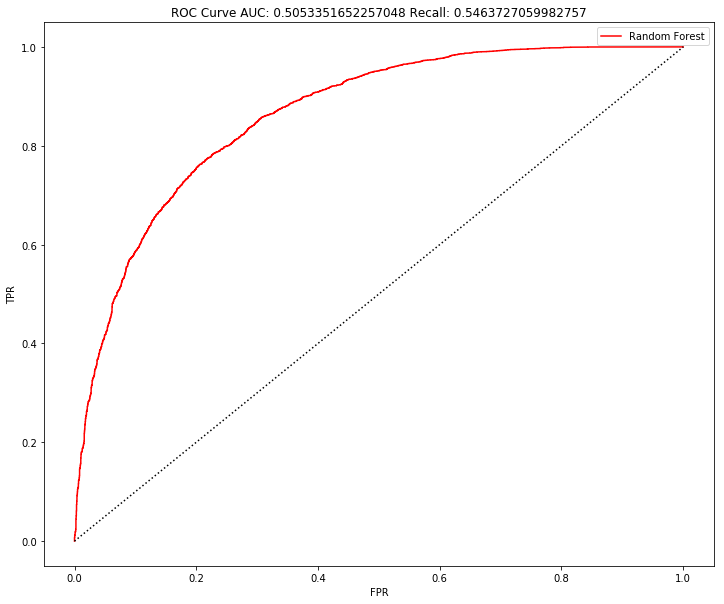

Best Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Roc Auc: 0.5053351652257048

Recall Score: 0.5463727059982757

Classification Report:
               precision    recall  f1-score   support

       False       0.63      0.66      0.65      5116
        True       0.38      0.35      0.36      3003

   micro avg       0.55      0.55      0.55      8119
   macro avg       0.51      0.51      0.50      8119
weighted avg       0.54      0.55      0.54      8119


Confusion Matrix:
 [[1044 1724]
 [1959 3392]]


In [61]:
    print_roc_curve(y_test, probas, 'Random Forest')
    print('Best Model: {}'.format(rf_model))
    print('\nRoc Auc: {}'.format(roc_auc))
    print('\nRecall Score: {}'.format(recall))
    print('\nClassification Report:\n {}'.format(class_report))
    print('\nConfusion Matrix:\n {}'.format(standard_confusion_matrix(y_test, predictions)))